In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
netflix_df = pd.read_csv('Case Studies/netflix/NetFlix.csv')

In [3]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [4]:
netflix_df.shape        # No of Rows and Columns 

(7787, 12)

In [5]:
netflix_df.size                    #Np of Elements

93444

In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [7]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [9]:
# Checking for Duplicate in  Dataset

In [10]:
netflix_df.duplicated().sum()

0

In [11]:
netflix_df.isnull().sum()   #Total Null Values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [12]:
# Replacing nan values with mode to 

In [13]:
netflix_df['director'].fillna('Uknown',inplace  = True)
netflix_df['cast'].fillna('Uknown',inplace  = True)
netflix_df['country'].fillna(netflix_df['country'].mode()[0], inplace =True)

In [14]:
# Droping Date as represent small fraction of dataset

In [15]:
netflix_df.dropna(subset = ['date_added'],inplace = True)

In [16]:
# Replacing rating nan with mode 

In [17]:
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0],inplace = True)

In [18]:
print(netflix_df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64


In [19]:
# Data Cleaning is completed so now moving on to Feature Extraction

In [20]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format ='%d-%b-%y', errors = 'coerce')

In [21]:
netflix_df['added_year']  = netflix_df['date_added'].dt.year
netflix_df['added_month'] = netflix_df['date_added'].dt.month_name()
netflix_df['added_day']   = netflix_df['date_added'].dt.day_name()

In [22]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
genres                  object
description             object
added_year             float64
added_month             object
added_day               object
dtype: object

In [23]:
current_year = datetime.now().year
netflix_df['content_age'] = current_year - netflix_df['release_year']  #Creating content age

Replacing old rattings with current ratings

In [24]:
ratings_mapping = {
    "TV-MA"    : "Mature Audiences",
    "TV-14"    : "Teens 14+",
    "TV-PG"    : "Parental Guidance",
     "R"       : "Restricted",
    "PG-13"    : "Teens 13+",
    "TV-Y"     : "All Children",
    "TV-Y7"    : "Older Children",
    "PG"       : "Parental Guidance",
    "TV-G"     : "General Audiences",
    "NR"       : "Not Rated",
    "G"        : "General Audiences",
   "TV-Y7-FV"  : "Older Children - Fantasy Violence",
    "UR"       : "Unrated",
    "NC-17"    : "Adults Only"
}

In [25]:
netflix_df['rating'] = netflix_df['rating'].map(ratings_mapping)

In [26]:
netflix_df['director'].replace('Uknown', 'unknown', inplace=True) #Replacing director
netflix_df['cast'].replace('Uknown','unknown', inplace = True) # Replacing Cast

In [27]:
netflix_df['country'].value_counts()

country
United States                             3055
India                                      923
United Kingdom                             396
Japan                                      225
South Korea                                183
                                          ... 
Argentina, United States, Mexico             1
Canada, Germany, France, United States       1
Soviet Union, India                          1
Taiwan, China, France, United States         1
France, Belgium, Spain                       1
Name: count, Length: 681, dtype: int64

since there are more countries producing 1 movie so we will split to get how many countries are there 

In [28]:
country_split = netflix_df[['show_id' , 'type' , 'country']].copy()
country_split.dropna(inplace = True)
country_split['country'] = country_split['country'].apply(lambda x : x.split(','))
country_split = country_split.explode('country')
country_split

,show_id,type,country
0,s1,TV Show,Brazil
1,s10,Movie,India
2,s100,Movie,Indonesia
3,s1000,Movie,United States
4,s1001,TV Show,United Kingdom
...,...,...,...
7784,s997,Movie,France
7784,s997,Movie,Belgium
7784,s997,Movie,Spain
7785,s998,Movie,United States


In [29]:
country_split['country'] = country_split['country'].str.strip()

In [30]:
country_split.loc[country_split['country'] == '']
country_split = country_split.loc[country_split['country'] != '']
country_split['country'].nunique()

117

In [31]:
x = country_split.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2661.0,1136.0
India,915.0,75.0
United Kingdom,467.0,255.0
Canada,286.0,126.0
France,265.0,84.0
...,...,...
Cuba,NaN,1.0
Cyprus,NaN,1.0
Mauritius,NaN,1.0


In [32]:
netflix_df['genres'].value_counts()

genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
Anime Features, Music & Musicals                                     1
Comedies, Cult Movies, Sports Movies                                 1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy           1
TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows                        1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy      1
Name: count, Length: 491, dtype: int64

Since a movie or TV show can have more than one genre so we need to split to get how many genres are there 

In [33]:
# Create a copy of the required columns to avoid the warning
split_genres = netflix_df[['show_id', 'type', 'genres']].copy()

# Split the genres column and explode it
split_genres['genres'] = split_genres['genres'].apply(lambda x: x.split(','))
split_genres = split_genres.explode('genres')

# Strip whitespace from each genre
split_genres['genres'] = split_genres['genres'].str.strip()

In [34]:
split_genres

,show_id,type,genres
0,s1,TV Show,International TV Shows
0,s1,TV Show,TV Dramas
0,s1,TV Show,TV Sci-Fi & Fantasy
1,s10,Movie,Horror Movies
1,s10,Movie,International Movies
...,...,...,...
7785,s998,Movie,Dramas
7785,s998,Movie,Independent Movies
7786,s999,Movie,Dramas
7786,s999,Movie,Independent Movies


<!-- EDA Analysis -->

# Explotary Data Analysis 

Count of type in netflix

In [35]:
netflix_df['type'].value_counts()

type
Movie      5377
TV Show    2400
Name: count, dtype: int64

Top 10 Countries

In [36]:
netflix_df['country'].value_counts().head(10)

country
United States     3055
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: count, dtype: int64

# How many unique shows and movies are there?

In [37]:
unique_titles = netflix_df['title'].nunique()
unique_types = netflix_df['type'].value_counts()

print(f"Unique Titles: {unique_titles}")
print("Content Type Distribution:\n", unique_types)

Unique Titles: 7777
Content Type Distribution:
 type
Movie      5377
TV Show    2400
Name: count, dtype: int64


# What is the distribution of content types (Movies vs. TV Shows)?

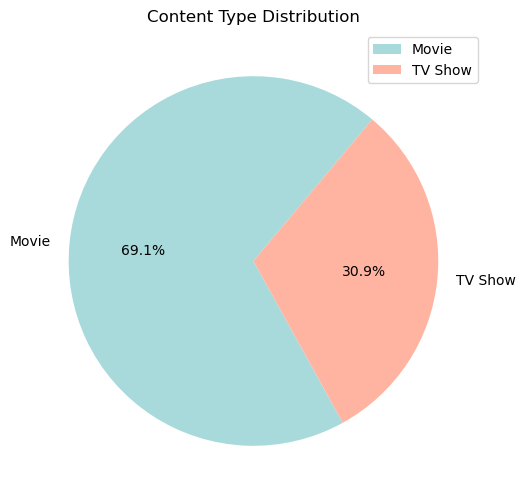

In [38]:
content_types = netflix_df['type'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Content Type Distribution")
plt.pie(content_types, labels = content_types.index, autopct='%1.1f%%', colors=['#a8dadc','#ffb4a2'], startangle=50)
plt.legend()
plt.show()


Inference - Movies are more available as compare to Tv Shows

Recomendations - More TV Shows should be Added for

Checking for Mininmum year present in data

In [39]:
min(netflix_df['added_year'])

2008.0

Checking for the Maximum year in data 

In [40]:
max(netflix_df['added_year'])

2021.0

# Titles Added Per Year 

In [41]:
netflix_df['added_year'] = pd.to_numeric(netflix_df['added_year'], errors='coerce')

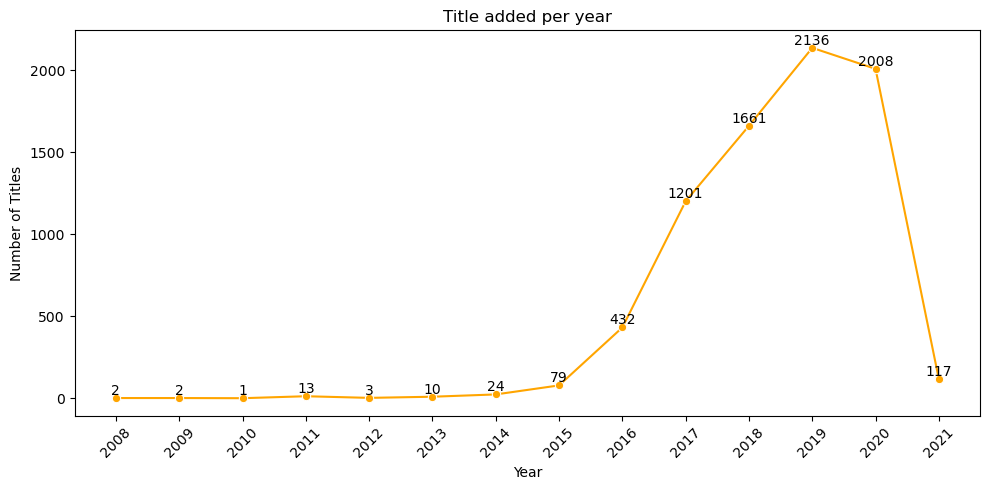

In [42]:
titles_per_year = netflix_df.groupby('added_year').size().reset_index(name ='count')
titles_per_year = titles_per_year.sort_values(by='added_year')
plt.figure(figsize=(10,5))
sns.lineplot(data = titles_per_year, x = 'added_year',y= 'count', marker = 'o' , color = 'orange')
for i in range(len(titles_per_year)):
    plt.text(titles_per_year['added_year'].iloc[i], titles_per_year['count'].iloc[i], 
             str(titles_per_year['count'].iloc[i]), ha='center', va='bottom')
plt.title("Title added per year")
plt.xlabel('Year')
plt.ylabel("Number of Titles")
plt.xticks(sorted(titles_per_year['added_year'].astype(int)), rotation=45)
plt.tight_layout()
plt.show()

# Titles added per month

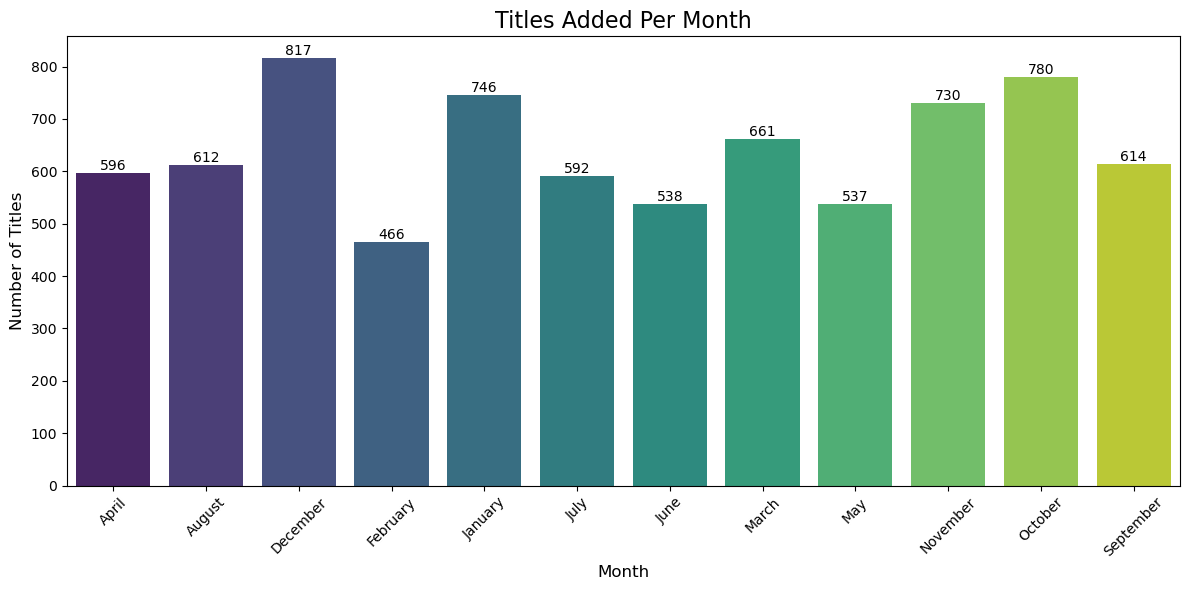

In [43]:
# Count titles added per month and sort by month
titles_per_month = netflix_df['added_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=titles_per_month.index, y=titles_per_month.values, hue =titles_per_month.index ,palette='viridis', dodge=False)

# Adding text labels for each bar
for i in range(len(titles_per_month)):
    plt.text(i, titles_per_month.values[i], str(titles_per_month.values[i]), ha='center', va='bottom')

# Customizing the plot
plt.title('Titles Added Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<!-- Top 10 Genere -->

# Top 10 Genre

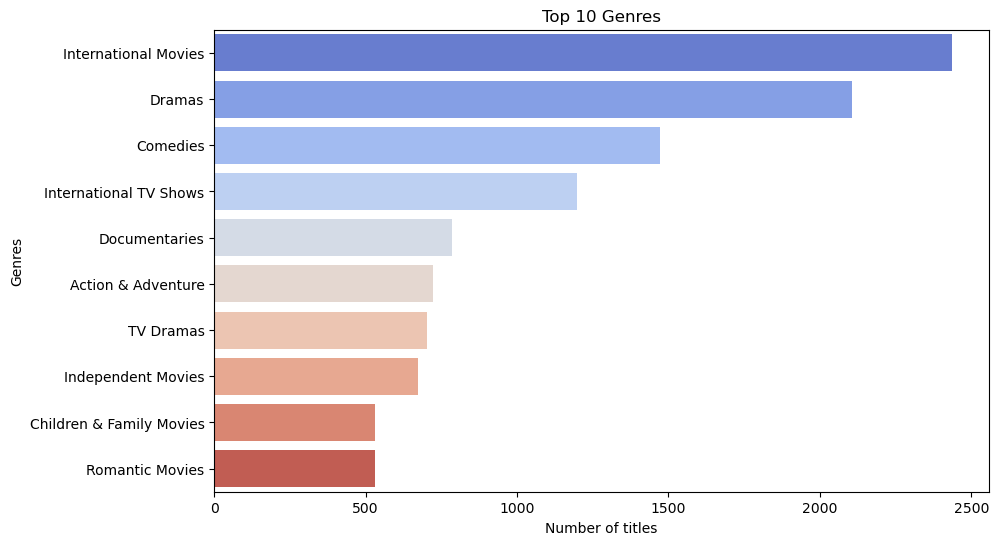

In [44]:
top_10_genres = split_genres['genres'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x = top_10_genres.values , y = top_10_genres.index , palette='coolwarm' , hue= top_10_genres.index)
plt.title("Top 10 Genres")
plt.xlabel('Number of titles')
plt.ylabel('Genres')
plt.show()

# Top 10 Countries Producing Netflix Content

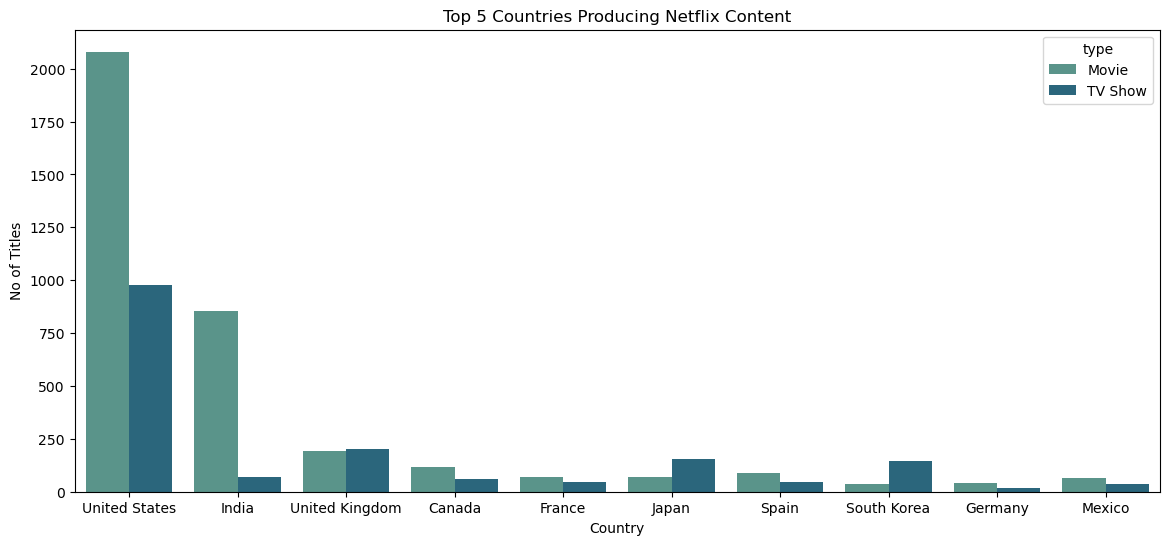

In [45]:
top_countries = country_split['country'].value_counts().head(10)
type_order = ['Movie', 'TV Show'] 
# Bar plot
plt.figure(figsize=(14, 6))
sns.countplot(data = netflix_df, x = 'country' , hue = 'type' , hue_order=type_order, order = top_countries.index , palette='crest')
plt.title('Top 5 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('No of Titles')
plt.show()

# Distribution of Ratings 

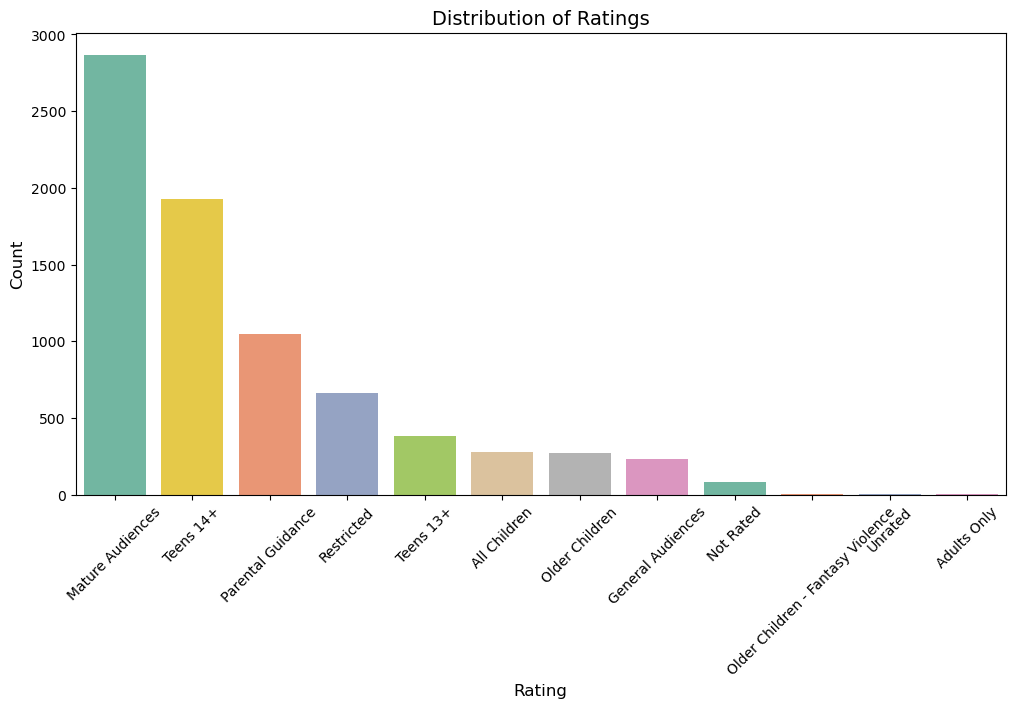

In [46]:
Top_Ratings = netflix_df['rating'].value_counts().index
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df , x='rating', hue = 'rating' , order = Top_Ratings ,palette='Set2')
plt.title('Distribution of Ratings' , fontsize = 14)
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45,fontsize = 10)  # Rotate labels if needed
plt.show()

# Ratings Distribution by Type

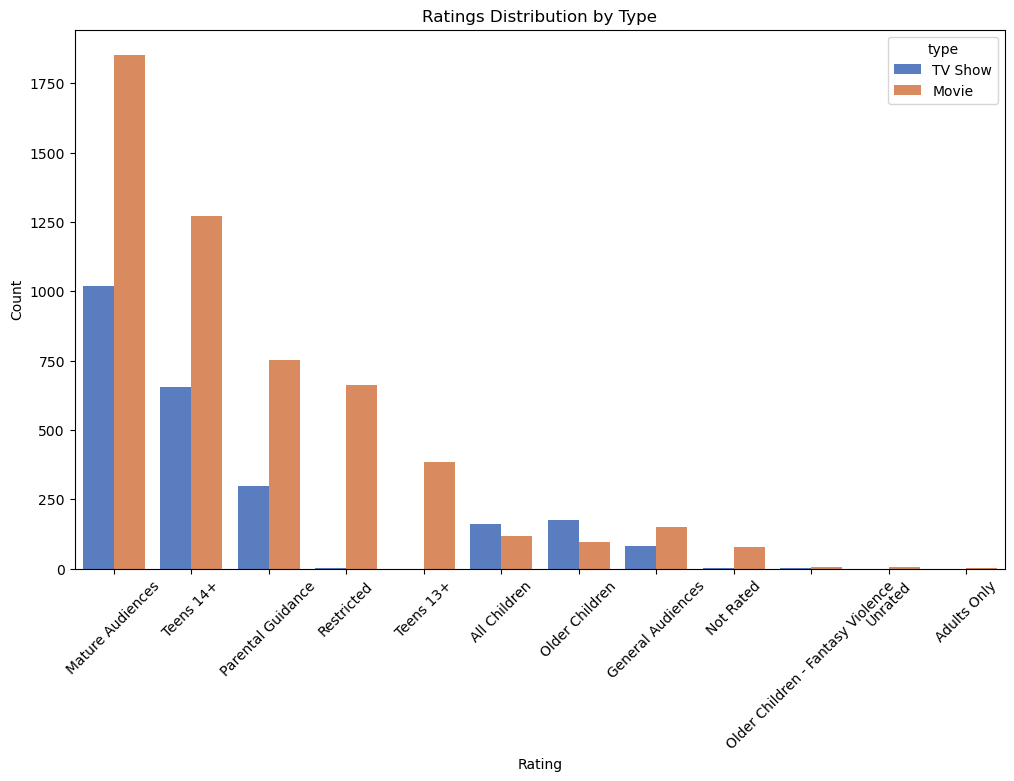

In [47]:
plt.figure(figsize=(12, 7))
sns.countplot(data=netflix_df, x='rating', hue='type', palette='muted', order=netflix_df['rating'].value_counts().index)
plt.title("Ratings Distribution by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Average Content Age Across Release Years

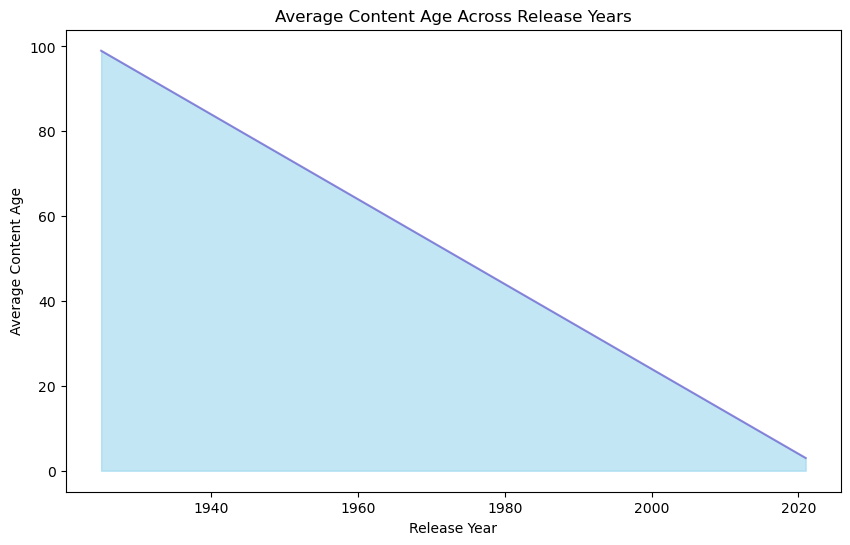

In [48]:
content_years = netflix_df.groupby('release_year')['content_age'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.fill_between(content_years['release_year'], content_years['content_age'], color='skyblue', alpha=0.5)
plt.plot(content_years['release_year'], content_years['content_age'], color='Slateblue', alpha=0.7)
plt.title('Average Content Age Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Average Content Age')
plt.show()


# Trend of each type of content Released over the years

''

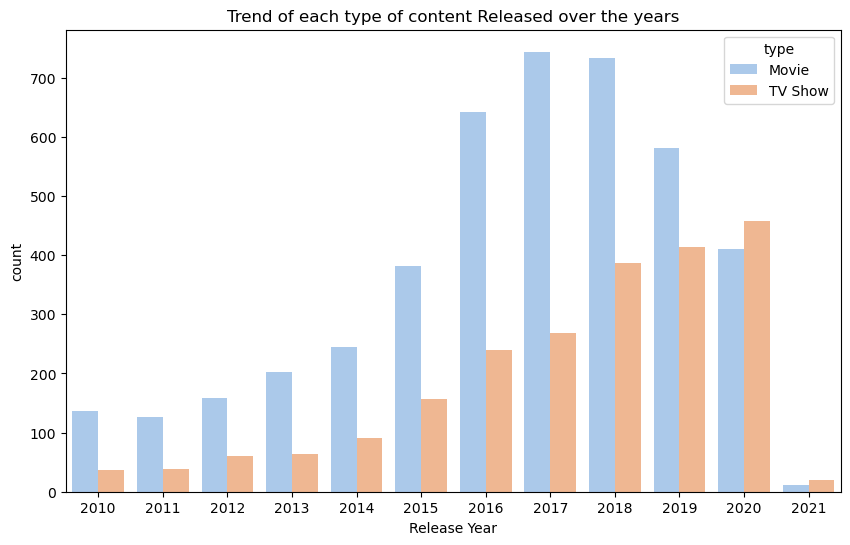

In [49]:
last_decade = netflix_df[["type", "release_year"]]
last_decade = last_decade.rename(columns = {"release_year" : "Release Year"})
last_decade = last_decade[last_decade["Release Year"]>=2010]
last_decade
last_decade_df = last_decade.groupby("Release Year")["type"].size().reset_index()
last_decade.groupby("Release Year")["type"].value_counts()
plt.figure(figsize = (10,6))
count_plot = sns.countplot(x = "Release Year", data = last_decade, hue="type",
             palette= "pastel")
count_plot.set(title = "Trend of each type of content Released over the years")
;

# Top 10 Directors 

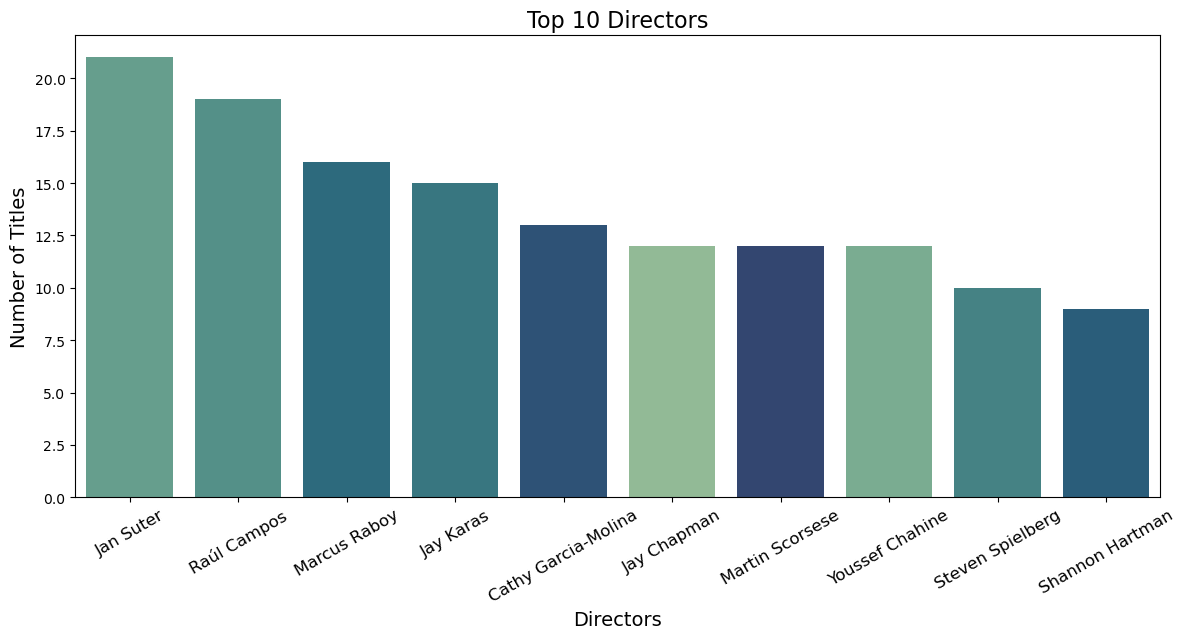

In [50]:
# Explode the director column to separate rows
dir_tb = netflix_df[['show_id' , 'type' , 'director']].copy()
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb
dir_tb = dir_tb.explode('director')

# Clean whitespace and filter out unknown directors
dir_tb['director'] = dir_tb['director'].str.strip()
known_directors = dir_tb[dir_tb['director'].str.lower() != 'unknown']

# Get the count of each director and identify the top 10
director_counts = known_directors['director'].value_counts()
top_directors = director_counts.head(10).index

# Filter the data to include only the top directors
top_directors_data = known_directors[known_directors['director'].isin(top_directors)]

# Plot the top directors
plt.figure(figsize=(14, 6))
sns.countplot(
    data=top_directors_data,
    x='director',
    hue = 'director',
    order=top_directors,
    palette='crest'
)
plt.title("Top 10 Directors", fontsize=16)
plt.xlabel("Directors", fontsize=14)
plt.ylabel("Number of Titles", fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.show()


# Top 10 Actors 

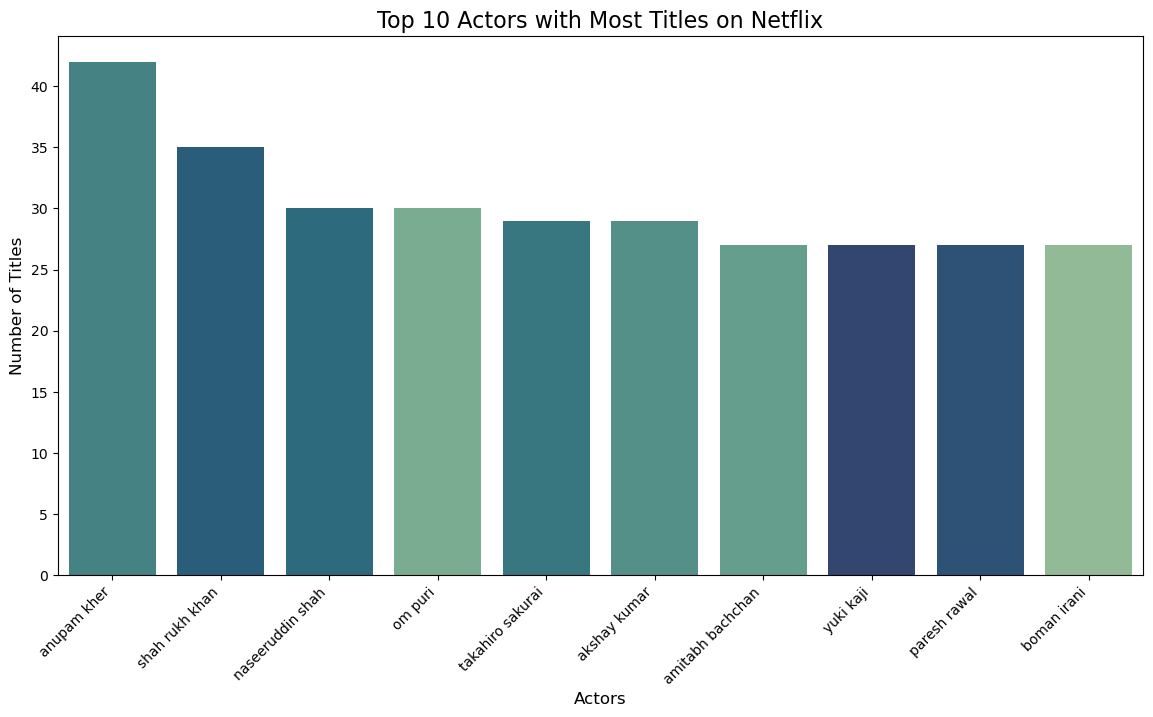

In [51]:
# Explode the 'cast' column to separate rows for each actor
cast_tb = netflix_df[['show_id', 'type', 'cast']].copy()

# Drop rows where 'cast' is missing
cast_tb.dropna(inplace=True)

# Clean and explode the 'cast' column
cast_tb['cast'] = cast_tb['cast'].str.lower().str.strip()  # Consistent formatting
cast_tb['cast'] = cast_tb['cast'].apply(lambda x: x.split(','))  # Split into lists
cast_tb = cast_tb.explode('cast')  # Explode to separate rows for each actor
cast_tb['cast'] = cast_tb['cast'].str.strip()  # Remove whitespace around names

# Filter out rows with 'unknown' in the cast column
known_cast = cast_tb[cast_tb['cast'] != 'unknown']

# Get the count of each actor and identify the top 10
actor_counts = known_cast['cast'].value_counts()
top_actors = actor_counts.head(10).index

# Filter the data to include only the top actors
top_actors_data = known_cast[known_cast['cast'].isin(top_actors)]

# Plot the top actors
plt.figure(figsize=(14, 7))
sns.countplot(
    data=top_actors_data,
    x='cast',
    hue = 'cast',
    order=top_actors,
    palette='crest'
)
plt.title("Top 10 Actors with Most Titles on Netflix", fontsize=16)
plt.xlabel("Actors", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


# Most Frequent Words in Titles

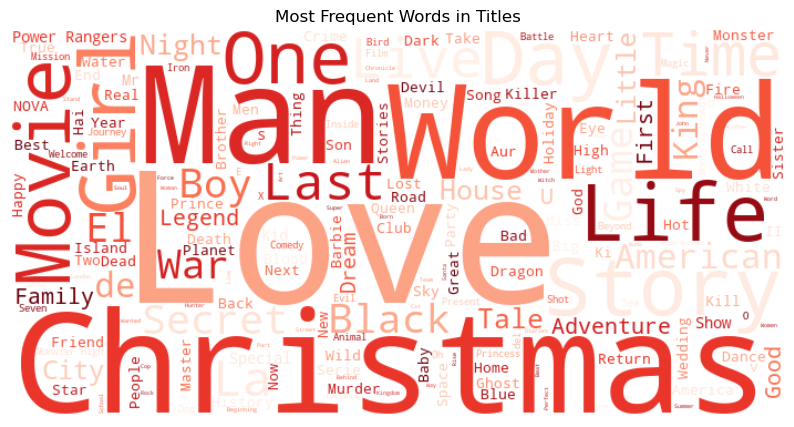

In [52]:
from wordcloud import WordCloud
text = " ".join(netflix_df['title'].dropna())
wordcloud = WordCloud(width = 700 , height = 350 , background_color='white', colormap='Reds').generate(text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Titles")
plt.show()

# Most Frequent Words in Genres

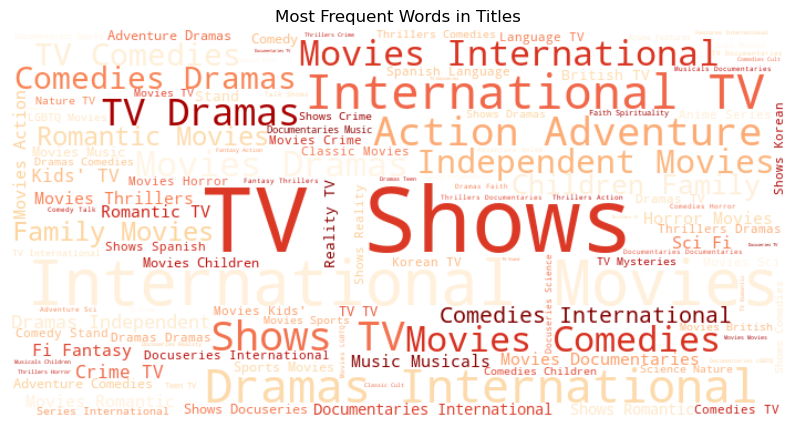

In [53]:
text1 = " ".join(split_genres['genres'].dropna())
wordcloud1 = WordCloud(width = 700 , height = 350 , background_color='white', colormap='OrRd').generate(text1)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Titles")
plt.show()

# Average Duration by Genre

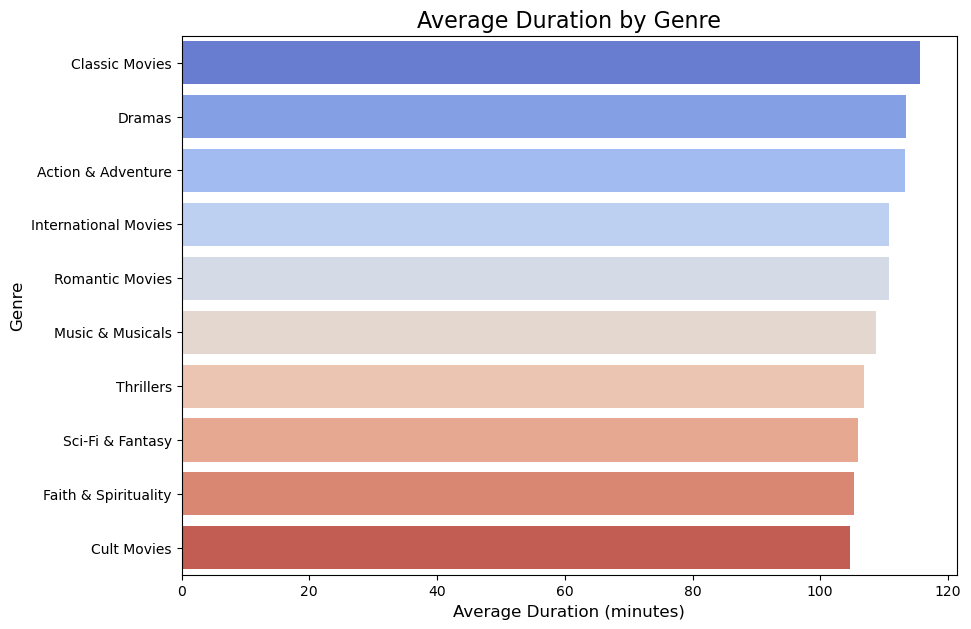

In [58]:
# Group by genre and calculate the average duration
avg_duration_by_genre = split_genres.groupby('genres')['duration'].mean().sort_values(ascending=False).head(10)

# Plot the average duration by genre
plt.figure(figsize=(10, 7))
sns.barplot(x=avg_duration_by_genre.values, y=avg_duration_by_genre.index, hue = avg_duration_by_genre.index, palette='coolwarm')
plt.title("Average Duration by Genre", fontsize=16)
plt.xlabel("Average Duration (minutes)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()